<a href="https://colab.research.google.com/github/Jaiharish-passion07/Fourth_Capstone_Clustering_project/blob/master/INDIVIDUAL_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **# making some hypothissis from data visualized , commented code , proper output formating and 1 more eda  have to do this more things**

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
from scipy import stats
import pylab
import plotly
import plotly.graph_objects as go
import plotly.offline as pyo
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from plotly.offline import init_notebook_mode
import plotly.express as px
import time
from datetime import datetime
from datetime import timedelta
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Clustering Project/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
df=pd.DataFrame(df)

In [ ]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


Exploratory Data Analysis

In [ ]:
df.shape

(7787, 12)

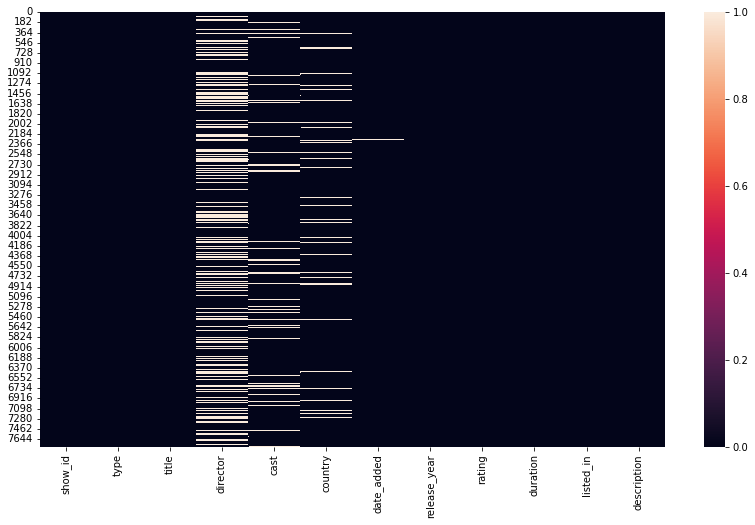

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(df.isna())

In [ ]:
df.drop(['director'],axis=1,inplace=True)
df_cleaned=df.dropna(subset=['cast','country','date_added','rating'],axis=0)

In [ ]:
df_cleaned.isnull().sum()/len(df)*100

show_id         0.0
type            0.0
title           0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64

In [ ]:
df_cleaned['country']=df_cleaned['country'].apply(lambda x:x.split(","))

In [ ]:
df_new=pd.DataFrame(columns=df_cleaned.columns)

In [ ]:
indic=0
count=0
for index, row in df_cleaned.iterrows():
    if len(df_cleaned.loc[index,'country'])>1:
      count=len(df_cleaned.loc[index,'country'])+count
      for data in df_cleaned.loc[index,'country']:
        country_name=[]
        indic=indic+0
        country_name_list=list(df_cleaned.loc[index])
        country_name.append(data)
        country_name_list[4]=country_name
        df_new.loc[indic]=country_name_list
        indic=indic+1
      df_cleaned.drop(index,inplace=True)

In [ ]:
df_cleaned.reset_index(drop=True,inplace=True)
df_clean_frame=df_cleaned.append(df_new,ignore_index=True)

In [ ]:
df_clean_frame['country']=df_clean_frame['country'].apply(lambda x:x[0])
df_clean_frame['date_added']=df_clean_frame['date_added'].apply(lambda x:x.strip())
df_clean_frame['date_added']=df_clean_frame['date_added'].apply(lambda x:datetime.strptime(x,'%B %d, %Y'))
df_clean_frame['release_year']=df_clean_frame['release_year'].astype('int')

In [ ]:
df_clean_frame.rename(columns={'type':'Type_of_show','title':'Title_of_Movie/show','cast':'Actors','date_added':'Date_Added_in_netflix','release_year':'Release_year','rating':'Ratings','listed_in':'Genre'},inplace=True)

In [ ]:
df_clean_frame.drop([6361,6527],inplace=True)
df_clean_frame.reset_index(drop=True,inplace=True)

In [ ]:
df_clean_frame.dtypes

show_id                          object
Type_of_show                     object
Title_of_Movie/show              object
Actors                           object
country                          object
Date_Added_in_netflix    datetime64[ns]
Release_year                      int64
Ratings                          object
duration                         object
Genre                            object
description                      object
dtype: object

In [ ]:
df.tail()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [ ]:
#shape of df_clean_frame
df_clean_frame.shape

(8262, 11)

In [ ]:
#checking dtype of df_clean_frame
df_clean_frame.dtypes

show_id                          object
Type_of_show                     object
Title_of_Movie/show              object
Actors                           object
country                          object
Date_Added_in_netflix    datetime64[ns]
Release_year                      int64
Ratings                          object
duration                         object
Genre                            object
description                      object
dtype: object

###EDA

i)Name the cast who has been acted more times only for Indian Movies?<br>
ii)What is more popular on Netflix, movies or TV shows?<br>
iii)Name the top two countries where Netflix is most 

In [ ]:
df_clean_frame.head(3)

,show_id,Type_of_show,Title_of_Movie/show,Actors,country,Date_Added_in_netflix,Release_year,Ratings,duration,Genre,description
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


1) Name the cast who has been acted more times only for Indian Movies

In [ ]:
#extracing india from country column
df_india=df_clean_frame.loc[df_clean_frame['country']=='India',:]

In [ ]:
#defining stripping and returning the dates
def stripping(x):
  datas=[]
  for i in x:
    datas.append(i.strip())
  return datas

In [ ]:
#using lambda function for Actors feature in df_india variable
df_india['Actors']=df_india['Actors'].apply(lambda x:x.split(','))
df_india['Actors']=df_india['Actors'].apply(lambda x:stripping(x))

In [ ]:
#creating actors_list=[]
actors_list=[]
for i in df_india['Actors']:
  actors_list.extend(i)

In [ ]:
#top five actors who acted more times in indian movies
actors_df=pd.DataFrame(actors_list,columns=['Actors'])
actors_df=actors_df.value_counts().reset_index()
actors_df.rename(columns={0:'Count'},inplace=True)
actors_df.head(5)

,Actors,Count
0,Anupam Kher,39
1,Shah Rukh Khan,33
2,Naseeruddin Shah,29
3,Akshay Kumar,28
4,Om Puri,27


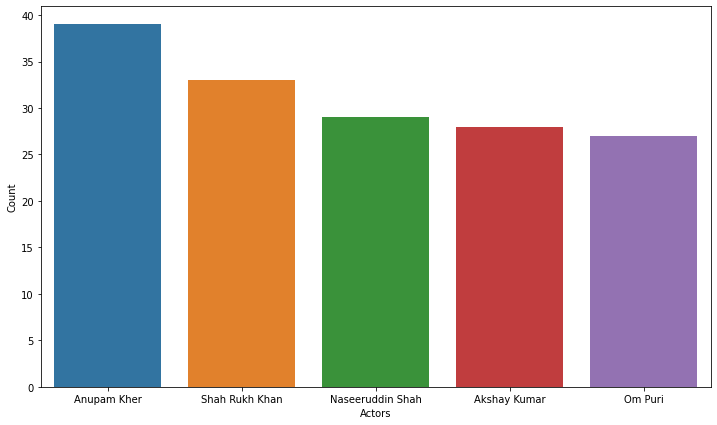

In [ ]:
#visualising top five actors who acted more times in indian movies
plt.figure(figsize=(12,7))
sns.barplot(x=actors_df['Actors'].head(5),y=actors_df['Count'].head(5))

2) What is more popular on Netflix, movies or TV shows?

In [ ]:
#Movies and Tv Shows available on netflix
movies_and_tv_shows=df_clean_frame['Type_of_show'].value_counts().reset_index()
movies_and_tv_shows

,index,Type_of_show
0,Movie,6080
1,TV Show,2182


In [ ]:
#visualising What is more popular on Netflix, movies or TV shows
(px.bar(movies_and_tv_shows, x="index",y="Type_of_show", color="index")
.update_layout(title_font_size=50)
.update_xaxes(showgrid=True)
).show()

3) Name the top two countries where Netflix is most popular?

In [ ]:
#top_two countries where netflix is most popular
top_two=df_clean_frame['country'].value_counts().head(3).reset_index()
top_two

,index,country
0,United States,2541
1,India,927
2,United Kingdom,499


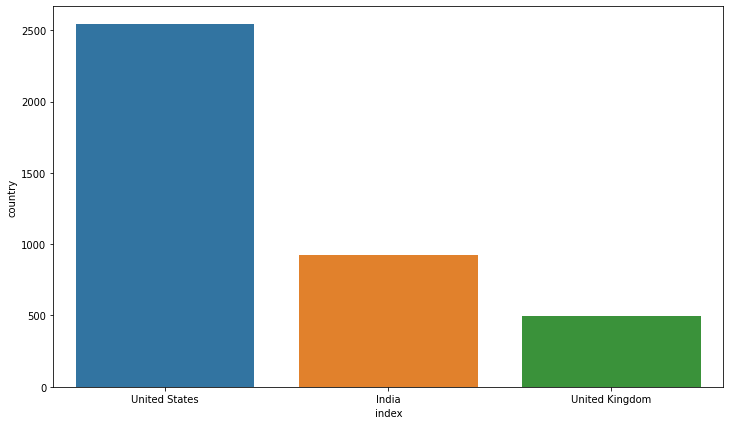

In [ ]:
#Visualising Which are the top two countries using Netfilx
plt.figure(figsize=(12,7))
sns.barplot(x=top_two['index'],y=top_two['country'])

TF-IDF Implementation

In [ ]:
#using tolist() function to Convert description column to list 
content = df_clean_frame['description'].tolist()
content

['In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.',
 'After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive.',
 "When an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that's haunting their jungle island training camp.",
 'In a postapocalyptic world, rag-doll robots hide in fear from dangerous machines out to exterminate them, until a brave newcomer joins the group.',
 'A brilliant group of students become card-counting experts with the intent of swindling millions out of Las Vegas casinos by playing blackjack.',
 'A genetics professor experiments with a treatment for his comatose sister that blends medical and shamanic cures, but unlocks a shocking side effect.',
 'After an awful accident, a couple admitted to a grisly hospital are separated and must find each o

In [ ]:
#using  lower() method for Changing the string into lower case
content = [low.lower() for low in content]
#using sub() function for Handling all the urls and (@) present in content variable 
content = [re.sub("\w+://\S+","", urls) for urls in content]
content =[re.sub("@\w+","", handles) for handles in content]

In [ ]:
#using tokenization functions for the text present in content variable
content= [word_tokenize(word) for word in content]

In [ ]:
#Removing stopwords and punctuation from the description feature 
removing_stopwords= stopwords.words("english")
removing_punctuation= list(punctuation)
removing_punctuation.extend(['...','``',"''",".."])
removing_context= ['rt', 'amp',"'s"]
final_variable= removing_stopwords + removing_punctuation + removing_context

In [ ]:
#defining final_stop function to remove the stop words
def final_stop(final):
    return [re.sub("#","",term) for term in final if ((term not in final_variable) & (len(term)>1))]
content_clean = [final_stop(clean) for clean in content]

In [ ]:
#creating a cleaned_list where all the words of the cleaned data is present and getting top 10 words using counter over top_term variable 
cleaned_list= []
for i in content_clean:
    cleaned_list.extend(i)
top_terms= Counter(cleaned_list)
top_terms.most_common(10)

[('young', 778),
 ('life', 714),
 ('new', 655),
 ('family', 610),
 ('man', 529),
 ('world', 502),
 ('woman', 488),
 ('love', 446),
 ('two', 445),
 ('must', 411)]

In [ ]:
#using join method to form a string by Joining all the words 
content_clean = [" ".join(label) for label in content_clean]

In [ ]:
#tfid_vectorizer variable 
tfid_vectorizer= TfidfVectorizer()

In [ ]:
#using tfid_vectorizer for fiting content_clean variable and converting it into arrays 
content_tfidf = tfid_vectorizer.fit_transform(content_clean).toarray()

In [ ]:
#shape of content_tfidf
content_tfidf.shape

(8262, 16635)

In [ ]:
#content_tfidf
content_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])